# <center>**Chess game- analysis of openings used**</center>
<center>Data analytics 2022</center>
<center>Made by: Barbara Wąsik, Aneta Walas</center>

**Data**

In the project we used data which contains over 20 000 chess games (exactly 20 058 games). The set of data was collected from played games on site Lichess.org. The data set was downloaded from Kaggle.com. 
The data set contains for each played game:
- Game ID;
- Rated (T/F);
- Start Time;
- End Time;
- Number of Turns;
- Game Status;
- Winner;
- Time Increment;
- White Player ID;
- White Player Rating;
- Black Player ID;
- Black Player Rating;
- All Moves in Standard Chess Notation;
- Opening Eco (Standardised Code for any given opening, list here);
- Opening Name;
- Opening Ply (Number of moves in the opening phase)

**Problem formulation**

The problem analyzed in the project focuses on the openings used in a chess games. In the dataset considered, there are more than 300 different openings used by players. The main purpose of the project was to model which openings will be used the most in the upcoming matches. Moreover, the opening used differs regarding its level of difficulty, success rate and overall skills of the player. These are very subjective aspects of every chess game, so there won't be considered while creating a model. But every opening, because of these aspects, has significant influence of the final number of turns used in a match. Because of that fact, the number of turns will be considered in one of the models as a factor, that has effect on the opening used.

Created models could be used to verify the most used opening in the chess games for the check mate result. Also, it could also be customized to use for other games that involve 1 on 1 encounter such as computing the likelihood of winning in footbal competition. 

**Data preparation**

Import of the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import numpy as np
import math
import scipy.stats as stats
from cmdstanpy import CmdStanModel

Read the data about the games/matches from external file.

In [2]:
file = 'D:\Studia\ProjektDA\games.csv'
games = pd.read_csv(file)
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In order to use data in convenient way, we applied mapping of the opening code names to numbers. 

The ECO Codes is a classification system for the chess openings moves. So each ECO Code is mapped to number. In the example below we can see what under the column opening_eco each unique openning has mapped a number.

In [3]:
l = games['opening_eco'].unique()
val = {}
for x in range(len(games['opening_eco'].unique())):
    val[l[x]] = x


games['opening_eco'] = games['opening_eco'].map(val)
opening_e = games[['opening_eco']]

games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,0,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,1,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,2,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,4,Philidor Defense,5


Text(0.5, 1.0, 'Openings used in games- codes')

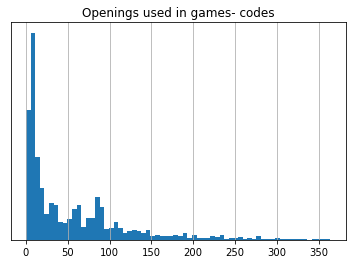

In [4]:
opening_e.hist(bins='auto')
plt.yticks([])
plt.title('Openings used in games- codes')

We decided to use only this part of the data in our computations which included games won by **mate**. In order to do this, we applied filtering data based on openings used depending on the result of a match - **mate**. Now the data set contains **6325** played games. Below there is shown the table which contains the data which we will use in computations for our two models.

In [5]:
mate = games[games.victory_status == 'mate']
mate[['id','turns','victory_status','opening_eco']].head()

,id,turns,victory_status,opening_eco
2,mIICvQHh,61,mate,2
3,kWKvrqYL,61,mate,3
4,9tXo1AUZ,95,mate,4
9,afoMwnLg,119,mate,8
10,HgKLWPsz,39,mate,9


In order to better visualize the distribustion of opening plays we counted how many times each openning occured.

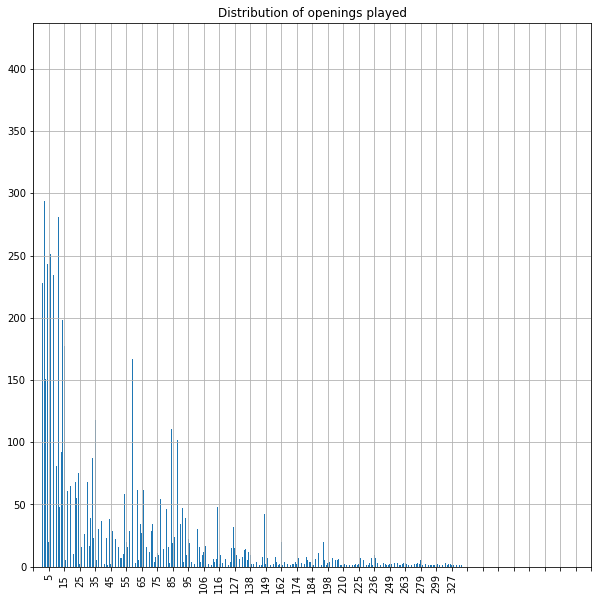

In [6]:
mate_plot = mate['opening_eco'].value_counts().sort_index()

mate_plot.plot(kind='bar',figsize=(10,10))
plt.xticks(np.arange(-5,362,10))
plt.grid()
plt.title('Distribution of openings played')
plt.show()

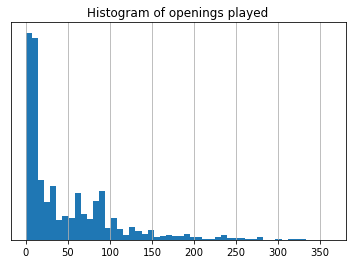

In [7]:
plt.hist(mate['opening_eco'],bins=50)
plt.yticks([])
plt.grid()
plt.title('Histogram of openings played')
plt.show()

As white and black pawns won different number of games and because white pawns always start the game, there was a decision to split data for analysis depending on the winner.

In [51]:
white = mate[mate['winner']=='white']
white.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,2,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,3,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,4,Philidor Defense,5
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,8,Scandinavian Defense: Mieses-Kotroc Variation,4
10,HgKLWPsz,False,1.503350e+12,1.503350e+12,39,mate,white,20+60,daniel_likes_chess,1381,anaissac,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,9,Van't Kruijs Opening,1


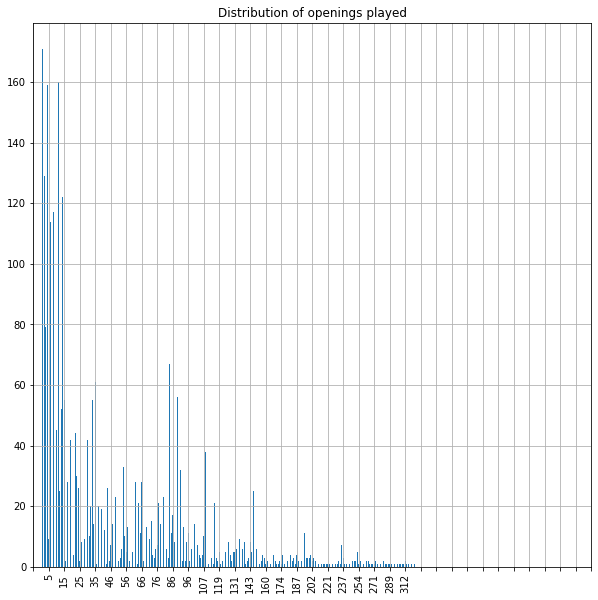

In [52]:
white_mate_plot = white['opening_eco'].value_counts().sort_index()

white_mate_plot.plot(kind='bar',figsize=(10,10))
plt.xticks(np.arange(-5,362,10))
plt.grid()
plt.title('Distribution of openings played for white player winners')
plt.show()

In [53]:

black = mate[mate['winner']=='black']
black.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
17,EwaK0IsE,False,1.504010e+12,1.504010e+12,66,mate,black,15+16,sureka_akshat,1141,shivangithegenius,1094,e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O Ne1 Ne8 ...,7,Four Knights Game: Italian Variation,8
27,srz9QfSN,True,1.502780e+12,1.502780e+12,54,mate,black,10+10,mannat1,1328,shivangithegenius,1038,d4 d5 Nc3 Nf6 Nf3 Nc6 e3 Bf5 h4 e6 g3 Bb4 a3 B...,18,Queen's Pawn Game: Chigorin Variation,4
29,M3vpf2Ki,True,1.502780e+12,1.502780e+12,66,mate,black,10+10,shivangithegenius,1077,chinmaysharma,1148,d4 d5 c4 Nf6 Nc3 Nc6 Nf3 e6 e3 Bd6 Bd3 Ne4 Bxe...,20,Queen's Gambit Refused: Marshall Defense,4
31,DiCTkvZH,True,1.502780e+12,1.502780e+12,64,mate,black,10+10,rv0209,1200,shivangithegenius,1002,e4 c5 Nf3 d6 Bb5+ Bd7 Bxd7+ Nxd7 O-O Ngf6 Nc3 ...,21,Sicilian Defense: Canal Attack | Main Line,6
64,XuyVUkDi,True,1.503970e+12,1.503970e+12,40,mate,black,5+10,porquepepe,1618,oldpaths,1568,e4 e6 Bc4 d5 exd5 exd5 Bb3 Qe7+ Ne2 Nf6 d4 Nc6...,11,French Defense #2,2


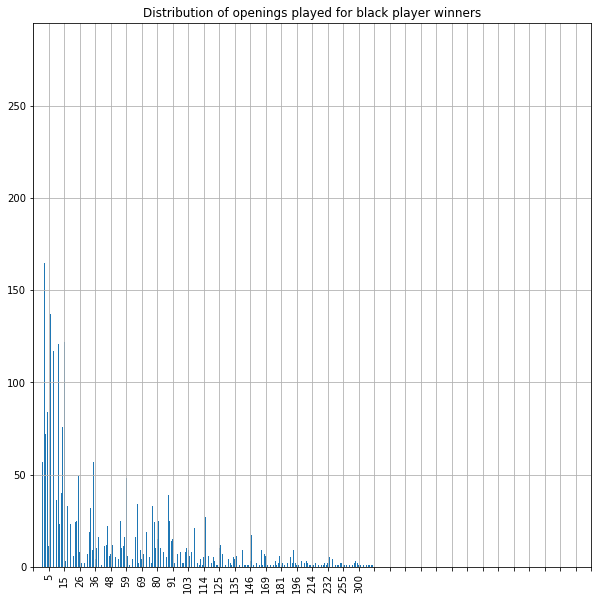

In [54]:
black_mate_plot = black['opening_eco'].value_counts().sort_index()

black_mate_plot.plot(kind='bar',figsize=(10,10))
plt.xticks(np.arange(-5,362,10))
plt.grid()
plt.title('Distribution of openings played for black player winners')
plt.show()

# <center>**Model 1**</center>

Based on the analysis of the data in the previous section we can observe that the distribution of the usage of specific openings takes the shape similiar to Poisson distribution. Based on that fact in the first model we decided to use Poisson model in which as the parameter lambda was used normal distribution. The values of mu and sigma for the normal distribution have been selected experimentally, what is shown on the figure below.

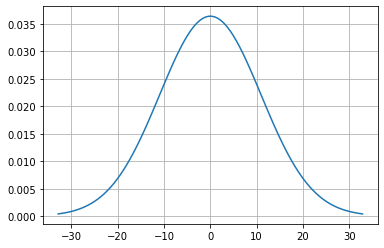

In [9]:
mu = 0
variance = 120
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.grid()
plt.show()

**Prior predicitive**

For prior predictive distribution was created the model that can be found in the file _prior.stan_. The data section has one parameter N, which describes number of games played. Then based on the experimental approach showed above the lambda parameter is calculated as a normal distribution with parameters mu = 0 and vairance = 120. The output y, which represents openings used, is calculated based on the values of parameter lambda as a Poisson distribution.

In [10]:
with open('prior.stan', 'r') as file:
    print(file.read())

data {
    int N; // number of games
}

generated quantities {
    real lambda = fabs(normal_rng(0,120));
    int y[N];
    for (k in 1:N) {
        y[k] = poisson_rng(lambda);
    }
}


In [11]:
model1_prior = CmdStanModel(stan_file='D:\Studia\ProjektDA\prior.stan')

data1_prior = {'N' : len(mate)}

samples1_prior = model1_prior.sample(data=data1_prior,
                        fixed_param=True, 
                        iter_sampling=1000, 
                        iter_warmup=0, 
                        chains=1, 
                        refresh=1000,
                        seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:12 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


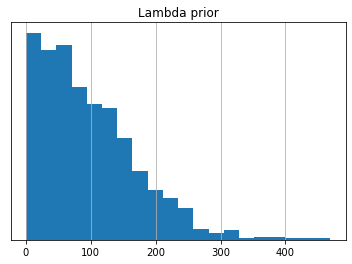

In [12]:
lambda1_prior =samples1_prior.stan_variable('lambda')
plt.hist(lambda1_prior,bins=20)
plt.yticks([])
plt.grid()
plt.title('Lambda prior')
plt.show()

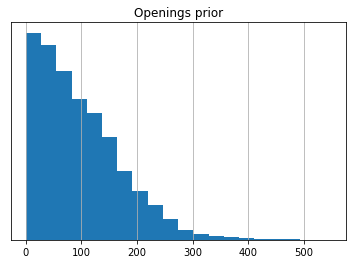

In [13]:
y_sim_prior = samples1_prior.stan_variable('y')
plt.hist(y_sim_prior.flatten(),bins=20)
plt.yticks([])
plt.grid()
plt.title('Openings prior')
plt.show()

**Posterior analysis**

In this section we introdue a model which we implemented. The model consist of parameters M and y. Where M represents the number of games analyzed and y- number of openings used. The parameters section of the stan model consists of lambda, which is the parameter of Poisson distribution. This parameter is computed based on the previous considerations as a normal distribution with mu = 0 and variance = 120. The number of predicted openings used is computed as a Poisson distribution.

In [14]:
with open('model1.stan', 'r') as file:
    print(file.read())

data {
  int M; //number of games analyzed
  int y[M]; //number of openings
}
parameters {
  real<lower=0>lambda;
}
model {
  lambda ~ normal(0,120);
  for (k in 1:M) {
    y[k] ~ poisson(lambda);
  }
}
generated quantities {
  vector[M] log_lik;
  int y_sim[M];
  for (k in 1:M) {
    log_lik[k]= poisson_lpmf(y[k] | lambda);
    y_sim[k] = poisson_rng(lambda);
  }
}


In [15]:
model1_post = CmdStanModel(stan_file='D:\Studia\ProjektDA\model1.stan')

data1_post_white = {'M' : len(white), 'y' : white['opening_eco'].values}
data1_post_black = {'M' : len(black), 'y' : black['opening_eco'].values}

samples1_post_white =  model1_post.sample(data = data1_post_white, 
                            fixed_param = False,
                            seed = 8052020)

samples1_post_black =  model1_post.sample(data = data1_post_black, 
                            fixed_param = False,
                            seed = 8052020)
                            

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:04 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:06 Iteration: 1100 / 2000 [ 55%]  (Sampling)


c


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:05 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:07 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 0


INFO:cmdstanpy:CmdStan done processing.


In [16]:
samples1_post_white.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,490000.0,0.0230,0.83,490000.0,490000.0,490000.0,1300.0,14.0,1.0
lambda,50.0,0.0032,0.12,50.0,50.0,50.0,1400.0,16.0,1.0
log_lik[1],-43.0,0.0031,0.12,-43.0,-43.0,-43.0,1440.0,16.0,1.0
log_lik[2],-40.0,0.0030,0.11,-40.0,-40.0,-40.0,1440.0,16.0,1.0
log_lik[3],-38.0,0.0029,0.11,-38.0,-38.0,-37.0,1440.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...
y_sim[3340],50.0,0.1100,7.10,38.0,50.0,62.0,4016.0,44.0,1.0
y_sim[3341],50.0,0.1100,7.00,39.0,50.0,62.0,3888.0,43.0,1.0
y_sim[3342],50.0,0.1100,7.10,39.0,50.0,62.0,4061.0,45.0,1.0


In [17]:
samples1_post_black.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,380000.0,0.0160,0.710,380000.0,380000.0,380000.0,2000.0,26.0,1.0
lambda,45.0,0.0034,0.120,45.0,45.0,45.0,1300.0,17.0,1.0
log_lik[1],-27.0,0.0028,0.100,-27.0,-27.0,-27.0,1349.0,17.0,1.0
log_lik[2],-13.0,0.0020,0.074,-13.0,-13.0,-13.0,1349.0,17.0,1.0
log_lik[3],-11.0,0.0019,0.069,-11.0,-11.0,-11.0,1349.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...
y_sim[2977],45.0,0.1000,6.600,35.0,45.0,57.0,3960.0,51.0,1.0
y_sim[2978],45.0,0.1100,6.700,34.0,45.0,56.0,3936.0,51.0,1.0
y_sim[2979],45.0,0.1100,6.800,34.0,45.0,56.0,4007.0,52.0,1.0


In [18]:
lambda1_post_white = samples1_post_white.stan_variable('lambda')
y_sim_post_white = samples1_post_white.stan_variable('y_sim')

lambda1_post_black = samples1_post_black.stan_variable('lambda')
y_sim_post_black = samples1_post_black.stan_variable('y_sim')

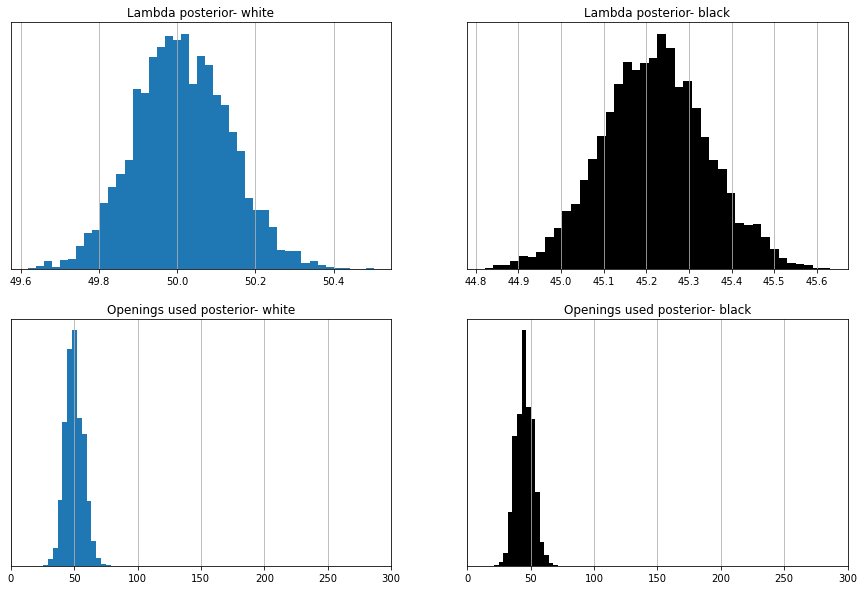

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

ax1 = axes[0][0]
ax1.hist(lambda1_post_white, bins='auto')
ax1.set_yticks([])
ax1.set_title('Lambda posterior- white')
ax1.grid()

ax2 = axes[0][1]
ax2.hist(lambda1_post_black, bins='auto', color='k')
ax2.set_yticks([])
ax2.set_title('Lambda posterior- black')
ax2.grid()

ax3 = axes[1][0]
ax3.hist(y_sim_post_white.flatten(), bins=20)
ax3.set_xlim([0,300])
ax3.set_yticks([])
ax3.set_title('Openings used posterior- white')
ax3.grid()

ax4 = axes[1][1]
ax4.hist(y_sim_post_black.flatten(), bins=20, color='k')
ax4.set_xlim([0,300])
ax4.set_yticks([])
ax4.set_title('Openings used posterior- black')
ax4.grid()
plt.show()

**Prediction**

The prepared model predicted that mostly used will be openings in the interval between 35 and 57.

In [20]:
median_y_sim_white = np.median(y_sim_post_white.flatten())
cinf_y_sim_white = az.hdi(y_sim_post_white.flatten(),0.89)

print('Median of predicted openings for white pawns =',median_y_sim_white)
print('Confidence interval = [',*cinf_y_sim_white,']')

Median of predicted openings for white pawns = 50.0
Confidence interval = [ 38.0 60.0 ]


In [21]:
median_y_sim_black = np.median(y_sim_post_black.flatten())
cinf_y_sim_black = az.hdi(y_sim_post_black.flatten(),0.89)

print('Median of predicted openings for black pawns =',median_y_sim_black)
print('Confidence interval = [',*cinf_y_sim_black,']')

Median of predicted openings for black pawns = 45.0
Confidence interval = [ 34.0 55.0 ]


# <center>**Model 2- considering number of turns**</center>

The second model is based on the first model described above, but it also considers the influence of number of turns in the match on the opening was played. In addition, in the second model there is a value of advantage added, which is based on number of games that were won by white or black pawns. 

**Prior predictive distribution**

For prior predictive distribution to the stan model was added a parameter t, which is of type vector and length N. The N, as in the first model, describes number of games played, whereas t is the number of turns in every game. The parameter t was added to the Poisson distribution and multiplied with the lambda parameter for calculatiing the output. 

In [22]:
print(len(black))
print(len(white))

addv_white = len(white)/len(black)
addv_black = len(black)/len(white)
print(addv_black)
print(addv_white)

2981
3344
0.8914473684210527
1.121771217712177


In [23]:
model2_prior = CmdStanModel(stan_file='D:\Studia\ProjektDA\\turns_prior.stan')

data2_prior = {'N' : len(mate), 't' : mate['turns'].values}

samples2_prior = model2_prior.sample(data=data2_prior,
                        fixed_param=True, 
                        iter_sampling=1000, 
                        iter_warmup=0, 
                        chains=1, 
                        refresh=1000,
                        seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:13 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


([], [])

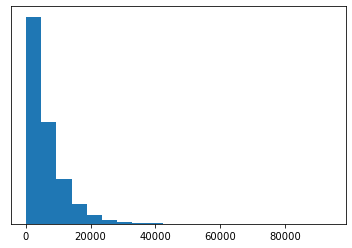

In [24]:
y_sim2_prior = samples2_prior.stan_variable('y')
plt.hist(y_sim2_prior.flatten(),bins=20)
plt.yticks([])

([], [])

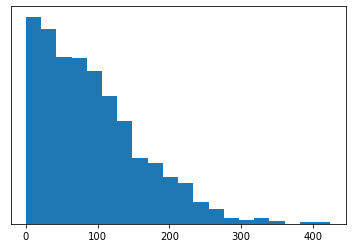

In [25]:
lambda2_prior = samples2_prior.stan_variable('lambda')
plt.hist(lambda2_prior,bins=20)
plt.yticks([])

**Posterior analysis** 

Posterior analysis differs from the first model in parameter t. As described in the previous section parameter t describes numbers of turns taken in a specific match. It is then added to the Poisson distribution and multiplied with the lambda parameter for calculating the y and predicted y. Where the y describes number(code) of the opening.

In [26]:
model2_post = CmdStanModel(stan_file='D:\Studia\ProjektDA\model2.stan')

data2_post_white = {'M' : len(white), 'y' : white['opening_eco'].values, 't' : white['turns'].values, 'addv': addv_white}
data2_post_black = {'M' : len(black), 'y' : black['opening_eco'].values, 't' : black['turns'].values, 'addv': addv_black}

samples2_post_white =  model2_post.sample(data = data2_post_white, 
                            fixed_param = False,
                            seed = 8052020)

samples2_post_black =  model2_post.sample(data = data2_post_black, 
                            fixed_param = False,
                            seed = 8052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:03 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


ch


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:09 Iteration: 1200 / 2000 [ 60


INFO:cmdstanpy:CmdStan done processing.


In [27]:
samples2_post_white.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,470000.00,0.018000,0.7900,470000.00,470000.00,470000.00,1900.0,20.0,1.0
lambda,0.76,0.000048,0.0019,0.76,0.76,0.76,1500.0,16.0,1.0
log_lik[1],-2.00,0.000079,0.0031,-2.00,-2.00,-2.00,1511.0,16.0,1.0
log_lik[2],-3.40,0.000140,0.0055,-3.40,-3.40,-3.40,1511.0,16.0,1.0
log_lik[3],-5.00,0.000210,0.0080,-5.00,-5.00,-5.00,1511.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...
y_sim[3340],34.00,0.090000,5.8000,25.00,34.00,44.00,4166.0,44.0,1.0
y_sim[3341],29.00,0.085000,5.4000,21.00,29.00,39.00,4040.0,43.0,1.0
y_sim[3342],57.00,0.120000,7.4000,45.00,56.00,69.00,3528.0,38.0,1.0


In [28]:
samples2_post_black.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,370000.00,0.016000,0.7500,370000.00,370000.00,370000.00,2300.0,28.0,1.0
lambda,0.65,0.000051,0.0019,0.65,0.65,0.66,1300.0,16.0,1.0
log_lik[1],-12.00,0.000490,0.0180,-12.00,-12.00,-12.00,1335.0,16.0,1.0
log_lik[2],-45.00,0.001300,0.0490,-45.00,-45.00,-45.00,1335.0,16.0,1.0
log_lik[3],-51.00,0.001500,0.0550,-52.00,-51.00,-51.00,1335.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...
y_sim[2977],39.00,0.100000,6.3000,29.00,39.00,50.00,3876.0,48.0,1.0
y_sim[2978],25.00,0.081000,5.0000,17.00,24.00,33.00,3873.0,48.0,1.0
y_sim[2979],39.00,0.100000,6.2000,29.00,39.00,49.00,3675.0,45.0,1.0


In [29]:
lambda2_post_white = samples2_post_white.stan_variable('lambda')
y_sim2_post_white = samples2_post_white.stan_variable('y_sim')

lambda2_post_black = samples2_post_black.stan_variable('lambda')
y_sim2_post_black = samples2_post_black.stan_variable('y_sim')

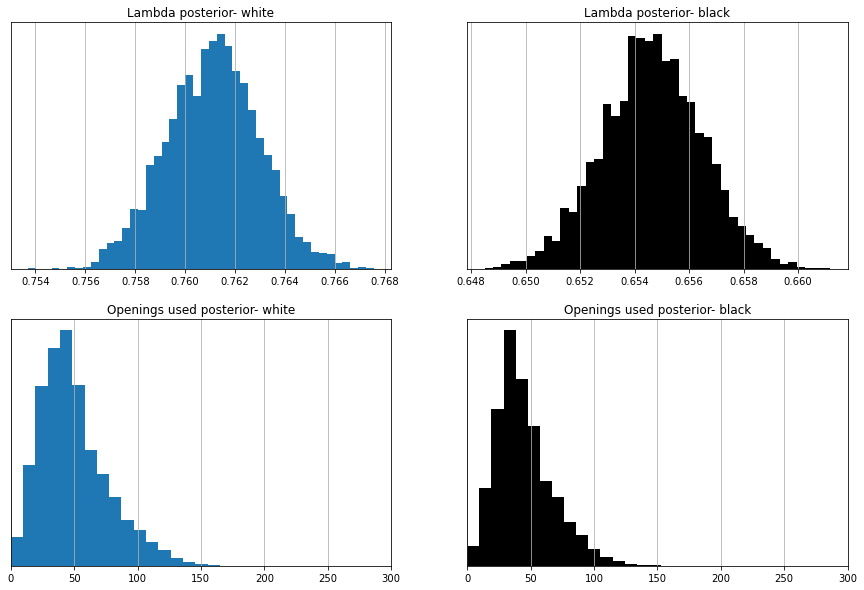

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

ax1 = axes[0][0]
ax1.hist(lambda2_post_white, bins='auto')
ax1.set_yticks([])
ax1.set_title('Lambda posterior- white')
ax1.grid()

ax2 = axes[0][1]
ax2.hist(lambda2_post_black, bins='auto', color='k')
ax2.set_yticks([])
ax2.set_title('Lambda posterior- black')
ax2.grid()

ax3 = axes[1][0]
ax3.hist(y_sim2_post_white.flatten(), bins=20)
ax3.set_xlim([0,300])
ax3.set_yticks([])
ax3.set_title('Openings used posterior- white')
ax3.grid()

ax4 = axes[1][1]
ax4.hist(y_sim2_post_black.flatten(), bins=20, color='k')
ax4.set_xlim([0,300])
ax4.set_yticks([])
ax4.set_title('Openings used posterior- black')
ax4.grid()
plt.show()

**Prediction**

The prepared model predicted that mostly used will be openings in the interval between 6 and 83. Comparing this to the distribution of the usage of openings it reflects the data. As we can see on the chart of openings used with the result of a game- mate we can see that the concetration of the openings used is in the predicted interval. Also, the large usage of the first openings has influence on the model.

The predicted interval was also compared with the specific number of openings used between codes 6 and 83. We can observe that in this interval the openings were widely used and the opening 83 was used only in 3 games, what is observable on the histogram of predicted y and on the plot of the data for the result- mate.

In [31]:
median_y_sim_white = np.median(y_sim2_post_white.flatten())
cinf_y_sim_white = az.hdi(y_sim2_post_white.flatten(),0.89)

print('Median of predicted openings for white pawns =',median_y_sim_white)
print('Confidence interval = [',*cinf_y_sim_white,']')

Median of predicted openings for white pawns = 45.0
Confidence interval = [ 6.0 86.0 ]


In [32]:
median_y_sim_black = np.median(y_sim2_post_black.flatten())
cinf_y_sim_black = az.hdi(y_sim2_post_black.flatten(),0.89)

print('Median of predicted openings for white pawns =',median_y_sim_black)
print('Confidence interval = [',*cinf_y_sim_black,']')

Median of predicted openings for white pawns = 41.0
Confidence interval = [ 10.0 78.0 ]


# <center>**Model Comparision**</center>

**Loo and waic comparision of 2 models for white pawns**

In [33]:
arviz_model_1_white = az.from_cmdstanpy(
    posterior=samples1_post_white,
    posterior_predictive="y_sim",
    log_likelihood="log_lik",
)

arviz_model_2_white = az.from_cmdstanpy(
    posterior=samples2_post_white,
    posterior_predictive="y_sim",
    log_likelihood="log_lik",
)

In [34]:
compare_dict_white = {'model1' : arviz_model_1_white, 'model2' : arviz_model_2_white}
loo_white = az.compare(compare_dict_white, ic = 'loo')
loo_white

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model1,0,-104320.349205,66.902139,0.000000,0.641807,2307.980306,0.00000,False,log
model2,1,-639625.038269,119.039433,535304.689064,0.358193,15691.666372,14081.49241,False,log


<AxesSubplot:xlabel='Log'>

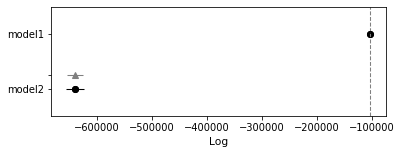

In [35]:
az.plot_compare(loo_white)

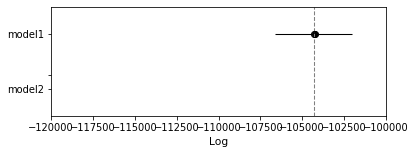

In [40]:
az.plot_compare(loo_white)
plt.xlim(-120000,-100000)
plt.show()

In [41]:
waic_white = az.compare(compare_dict_white, ic = 'waic')
waic_white

D:\anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model1,0,-104320.335943,66.888877,0.000000,0.641807,2307.979174,0.00000,True,log
model2,1,-639625.105239,119.106404,535304.769297,0.358193,15691.670459,14081.49698,True,log


<AxesSubplot:xlabel='Log'>

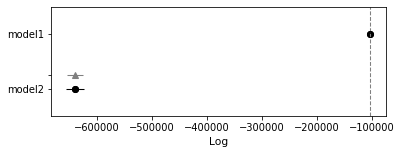

In [42]:
az.plot_compare(waic_white)

(-120000.0, -100000.0)

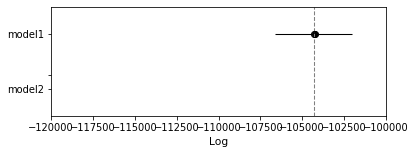

In [43]:
az.plot_compare(waic_white)
plt.xlim(-120000,-100000)

**Loo and waic comparision of 2 models for black pawns**

In [44]:
arviz_model_1_black = az.from_cmdstanpy(
    posterior=samples1_post_black,
    posterior_predictive="y_sim",
    log_likelihood="log_lik",
)

arviz_model_2_black = az.from_cmdstanpy(
    posterior=samples2_post_black,
    posterior_predictive="y_sim",
    log_likelihood="log_lik",
)

In [45]:
compare_dict_black = {'model1' : arviz_model_1_black, 'model2' : arviz_model_2_black}
loo_black = az.compare(compare_dict_black, ic = 'loo')
loo_black

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model1,0,-86886.664257,65.661389,0.000000,0.640121,2113.731318,0.000000,False,log
model2,1,-524953.975183,117.967044,438067.310926,0.359879,14111.152527,12554.511885,False,log


<AxesSubplot:xlabel='Log'>

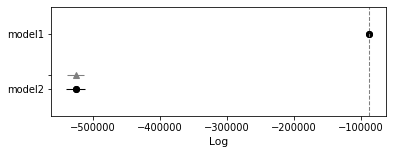

In [46]:
az.plot_compare(loo_black)

(-120000.0, -80000.0)

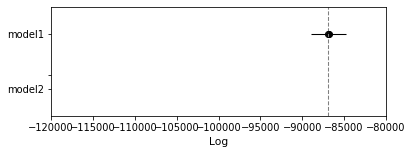

In [47]:
az.plot_compare(loo_black)
plt.xlim(-120000,-80000)

In [48]:
waic_black = az.compare(compare_dict_black, ic = 'waic')
waic_black

D:\anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
D:\anaconda3\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model1,0,-86886.726513,65.723645,0.000000,0.640121,2113.737908,0.000000,True,log
model2,1,-524954.002682,117.994543,438067.276169,0.359879,14111.154864,12554.509496,True,log


<AxesSubplot:xlabel='Log'>

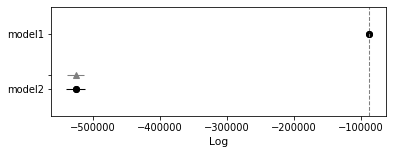

In [49]:
az.plot_compare(waic_black)

(-120000.0, -80000.0)

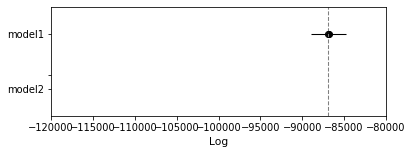

In [50]:
az.plot_compare(waic_black)
plt.xlim(-120000,-80000)

**Conclusion**

Based on the loo comparison for both white and black pawns, the rank of the model 1 is lower. This means that this model better fits the data. But the weight column for both cases shows that second model is better suited for the problem of predicting chess openings.
As we can see in predictions for both models the predicted intervals are quite similiar to most used opennings games which were analyzed. The most used openning games in analyzed games are placed in intervals between 1 to about 87 wchich is met with prediction results. 